**Practica 3 - Analisis estadistico - ECG**

Integrantes:
- Daniel Barrera Mazo
- Sergio Andres Daza


In [ ]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import scipy.stats as stats
from scipy.stats import levene, shapiro, mannwhitneyu
from statsmodels.tsa.stattools import adfuller
from scipy.stats import kstest, norm
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##***Funciones***

Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal. El valor
RMS se define en forma discreta con N número de muestras, como:

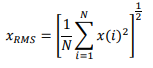

In [ ]:
# Se define la funcion RMS
def rms(N):
    return np.sqrt(np.sum(N**2)/len(N))

##*Señales*

Para este laboratorio, se le suministra el archivo de datos denominado signals.mat, el cual corresponde al registro de señales ECG y EMG.

Las señales se adquirieron a una tasa de muestreo de 1024 Hz. El registro correspondiente a las señales tal cual se registraron corresponde al campo asRecording de los archivos entregados.

Las señales se sometieron a un proceso de filtrado el cual corresponde al campo filtered.

In [ ]:
# Se importa el archivo .mat que contiene las senales a trabajar
signals = sio.loadmat('/content/drive/MyDrive/Colab Notebooks/signals.mat')
signals.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ECG_asRecording', 'ECG_filtered', 'EMG_filtered1', 'EMG_filtered2', 'EMG_asRecording1', 'EMG_asRecording2'])

In [ ]:
# Se extraen los set de datos de ECG_asRecording(Señal original) y ECG_filtered(Señal filtrada)
ECG_asRecording = signals['ECG_asRecording'][0] #El dato cargado cambia su estructura a un tipo Array
ECG_filtered = signals['ECG_filtered'][0]

# Se visualiza la forma de los arreglos
np.shape(ECG_asRecording)
np.shape(ECG_filtered)

(30720,)

Construccion del vector de tiempo

In [ ]:
# Se conoce la frecuencia de muestreo
fs = 1024
# A partir de este dato se puede obtener el periodo de muestreo
Ts = 1/fs
Ts

0.0009765625

In [ ]:
# Se obtiene la longitud del vector de tiempo
t_total = np.size(ECG_asRecording)*Ts # Numero de elementos del arreglo por el ts y obtener el vector de tiempo

# Se construye el vector de tiempo
t = np.arange(0, t_total, Ts) # Va de 0 a t_total en pasos de Ts
np.shape(t) # Se verifica logitud vector de tiempo

(30720,)

Se grafican las senales de ECG_asRecording y ECG_filtered

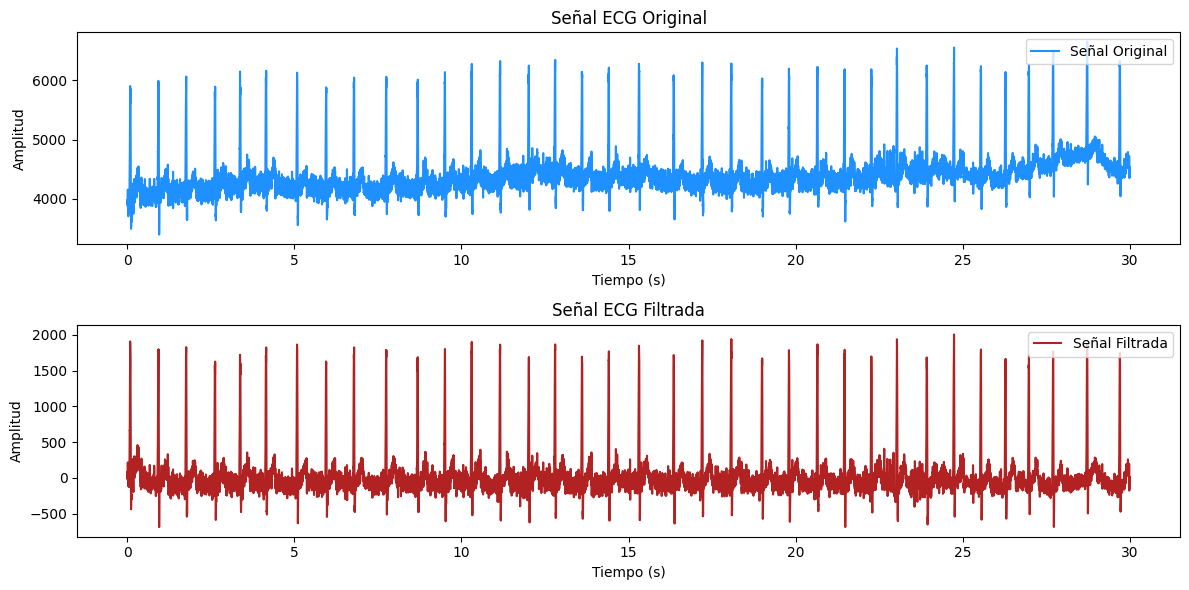

In [ ]:
# Se generan los subplots
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, ECG_asRecording, label='Señal Original', color='dodgerblue')
plt.title('Señal ECG Original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend(loc = "upper right")

plt.subplot(2, 1, 2)
plt.plot(t, ECG_filtered, label='Señal Filtrada', color='firebrick')
plt.title('Señal ECG Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend(loc = "upper right")

plt.tight_layout()
plt.show()

En la imagen 1. Se puede denotar algunas diferencias entre la señal original y la señal filtrada. La señal original presenta una variación amplia en sus valores de amplitud (aprox 4000 a 6000), ademas de un desplazamiento en el eje positivo Y (offset) de aproximadamente 4000, tambien se evidencian oscilaciones anormales en la base, lo que indica la presencia de ruido y datos inecesarion en la señal original. La oscilación de la lineal base se debe principalmente a la respiración y al movimiento de los músculos y se considera ruido de muy baja frecuencia.[1] Por otro lado la señal filtrada no se encuentra desplazada de su cero, ademas se evidencia un cambio en el intervalo de amplitudes (aprox -500 a 2000), y un comportamiento mas uniforme a lo largo del tiempo en la base de la señal, estos cambios se pueden deber a el tipo de filtracion que se ha realizado sobre los datos.

El comportamiento del filtro parece ser el de un filtro pasa bajas que atenua las fluctuaciones de alta frecuencia en la señal original, produciendo una señal filtrada con menos oscilaciones de base y una tendencia más constante en el tiempo.

Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el
promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.

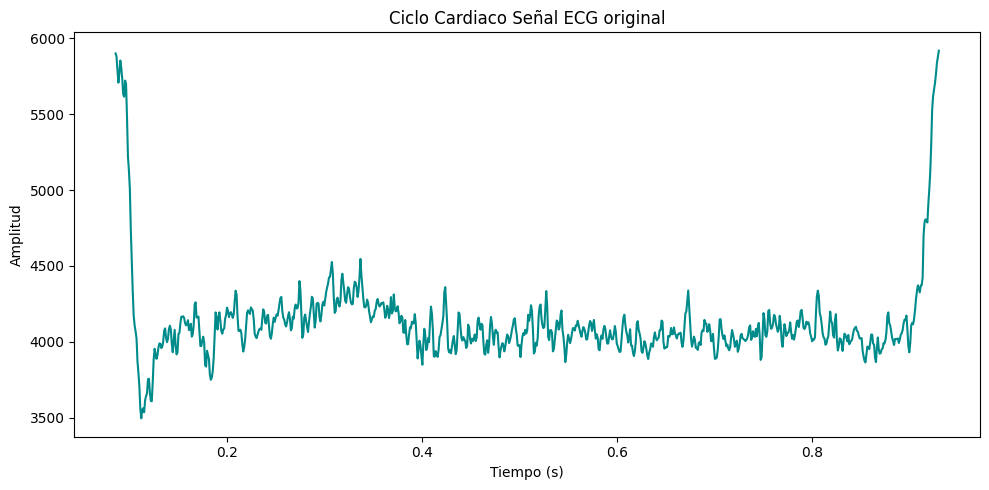

In [ ]:
# Picos máximos en la señal ECG original para aislamiento ciclo carfiaco
picosSeñal, _ = find_peaks(ECG_asRecording, distance=fs/2)

# Tiempos de los picos
tiempos_picos = t[picosSeñal[0]:picosSeñal[1]] # Se extrae del vector de tiempo un segmento
#print(tiempos_picos)

SeñalSinFiltar = ECG_asRecording[picosSeñal[0]:picosSeñal[1]] #Extrae datos entre el primer y segundo pico

# Grafica el ciclo cardíaco
plt.figure(figsize=(10, 5))
plt.plot(tiempos_picos, SeñalSinFiltar, color='darkcyan')
plt.title('Ciclo Cardiaco Señal ECG original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()

# Analisis estadistico para Señal sin filtrar

In [ ]:
# Promedio de la señal sin filtrar
media_DataSinfiltar = np.mean(SeñalSinFiltar)
print(f'El promedio de los datos en la señal sin filtrar es: {media_DataSinfiltar}')

# RMS
RMS_DataSinfiltar = rms(SeñalSinFiltar)
print(f'El RMS de los datos en la señal sin filtrar es: {RMS_DataSinfiltar}')

# Varianza de la señal sin filtrar
varianza_DataSinfiltar = np.var(SeñalSinFiltar)
print(f'La varianza en los datos en la señal sin filtrar es: {varianza_DataSinfiltar}')

# Desviación estándar de la señal sin filtrar
desviacion_DataSinfiltrar = np.std(SeñalSinFiltar)
print(f'La desviación estándar en la señal sin filtrar es: {desviacion_DataSinfiltrar}')


El promedio de los datos en la señal sin filtrar es: 4131.136266878161
El RMS de los datos en la señal sin filtrar es: 4142.454957820607
La varianza en los datos en la señal sin filtrar es: 93646.2220564969
La desviación estándar en la señal sin filtrar es: 306.01670225086883


El resultado del promedio representa la línea de base de la señal, como se puede observar en la figura, esta linea base se encuentra alrededor de 4000 en amplitud y es el offset en la captacion de la senal.

En cuanto al valor RMS que es 4142.45 se ve que es ligeramente mayor que el promedio (4131.14), lo cual es esperable. Esta pequeña diferencia se debe a la presencia de variaciones en la señal que incluyen picos tanto por encima como por debajo de la línea de base (ruido o las oscilaciones en la señal). Cuanto mayor sea la magnitud de las fluctuaciones, mayor será la diferencia entre el promedio y el RMS.

La varianza mide la dispersión de los valores respecto al promedio, y en este caso, el valor es 93646.22. Este valor elevado sugiere que hay una cantidad considerable de variabilidad en la amplitud de la señal, probablemente debido a ruido o fluctuaciones no fisiológicas.

En cuanto a la desviación estándar, el valor es 306.02, lo que indica que, en promedio, los datos se desvían unos 306 unidades respecto al promedio de 4131.14. Este valor relativamente elevado de desviación estándar, en comparación con la magnitud del promedio, sugiere que hay fluctuaciones significativas alrededor del valor basal de la señal.

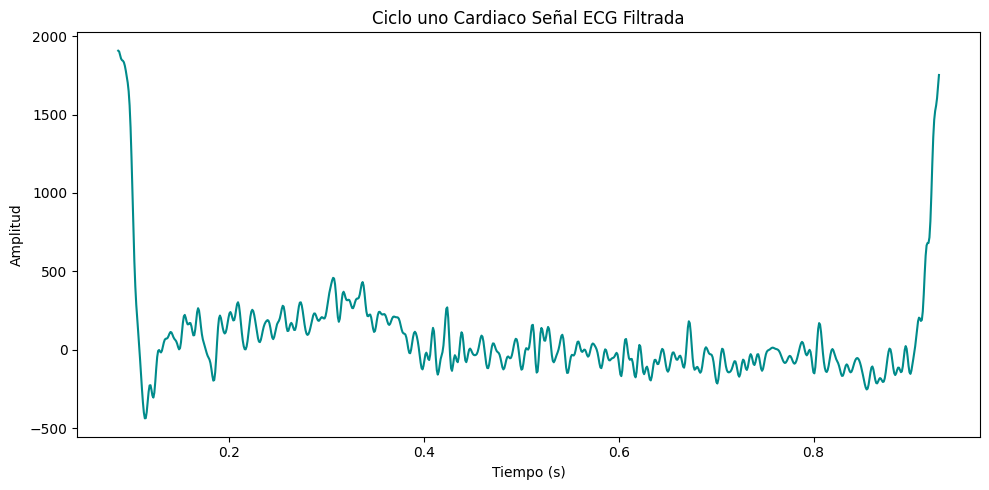

In [ ]:
# Picos máximos en la señal ECG filtrada
picosSeñal, _ = find_peaks(ECG_filtered, distance=fs/2)

# Tiempos de los picos
tiempos_picosFiltrada = t[picosSeñal[0]:picosSeñal[1]]
#print(tiempos_picosFiltrada)

SeñalFiltrada = ECG_filtered[picosSeñal[0]:picosSeñal[1]]

# Grafica el ciclo cardíaco
plt.figure(figsize=(10, 5))
plt.plot(tiempos_picosFiltrada, SeñalFiltrada, color='darkcyan')
plt.title('Ciclo uno Cardiaco Señal ECG Filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()

In [ ]:
# Promedio
media_DataFiltrada = np.mean(SeñalFiltrada)
print(f'El promedio de los datos en la señal filtrada es: {media_DataFiltrada}')

# Calcular RMS
RMS_DataFiltrada = rms(SeñalFiltrada)
print(f'El RMS de los datos en la señal filtarda es: {RMS_DataFiltrada}')

# Calcular la Varianza
varianza_DataFiltrada = np.var(SeñalFiltrada)
print(f'La varianza en los datos en la señal filtrada es: {varianza_DataFiltrada}')

# Calcular Desviación estándar
desviacion_DataFiltrada = np.std(SeñalFiltrada)
print(f'La desviación estándar en la señal filtrada es: {desviacion_DataFiltrada}')

El promedio de los datos en la señal filtrada es: 74.00995782055861
El RMS de los datos en la señal filtarda es: 319.62757818893766
La varianza en los datos en la señal filtrada es: 96684.31488232457
La desviación estándar en la señal filtrada es: 310.94101511753735


Comparacion y analisis:

Tras el filtrado, el promedio se reduce significativamente a 74.01, lo que indica que el filtro eliminó el offset (desplazamiento de la línea base), llevando la señal a oscilar alrededor de un valor cercano a cero, como se espera fisiológicamente para una señal ECG bien ajustada.

El RMS cae a 319.63 en la señal filtrada, lo cual indica una reducción significativa en la amplitud global de las oscilaciones. El valor más bajo del RMS es consistente con la eliminación del ruido de alta amplitud, manteniendo solo las oscilaciones necesarias que corresponden a la actividad eléctrica cardíaca relevante y eliminando perturbaciones de la señal electrocardiografica como la interferencia de línea de potencia, ruido por contacto de electrodos, artefactos de movimiento, contracción muscular y Ruido electro-quirúrgico.[2]

La varianza de la señal filtrada es ligeramente mayor, 96684.31. Esto puede parecer contradictorio al principio, dado que la señal visualmente es más limpia. Sin embargo, este aumento en la varianza puede estar relacionado con una mayor definición de las oscilaciones en la señal, ya que ahora los picos QRS y otros componentes fisiológicos son más pronunciados en ausencia del ruido de baja frecuencia.

 La desviación estándar apenas cambia, subiendo ligeramente a 310.94. Esto es consistente con la variación observada en la varianza. A pesar de la reducción de ruido, la señal ahora tiene picos más marcados, particularmente en las partes que corresponden al complejo QRS, lo cual contribuye a una mayor variabilidad en torno a la media.

Extracción de ciclos

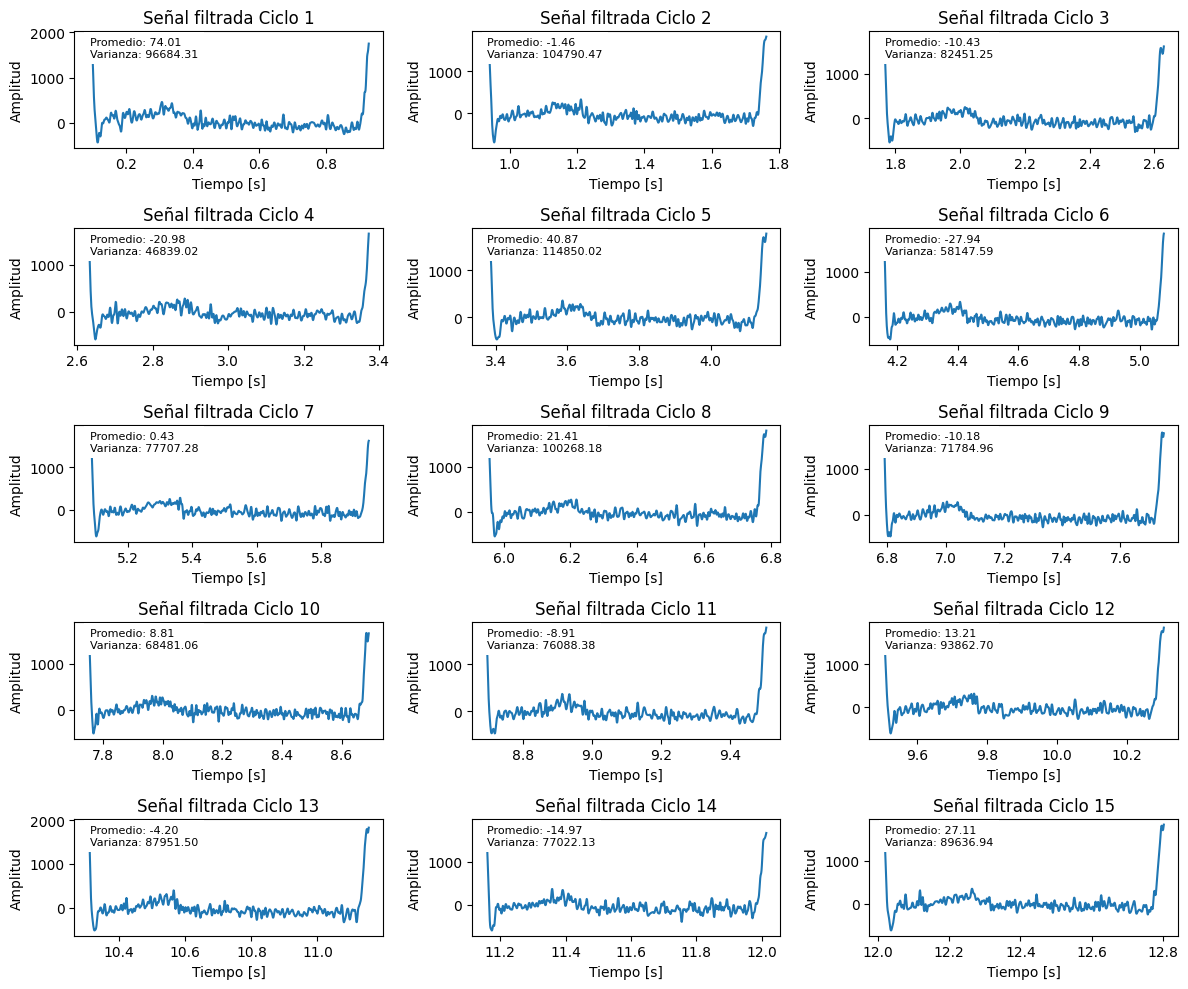

In [ ]:
# Variables y listas
num_ciclos = 15
numero_ciclos = []
media = []
varianzas = []

# Se crea la figura
fig, axes = plt.subplots(5, 3, figsize=(12, 10))

# Se realiza una iteracion para graficar cada ciclo
for i in range(num_ciclos):
    ciclo = ECG_filtered[picosSeñal[i]:picosSeñal[i + 1]]
    numero_ciclos.append(ciclo)
    media.append(np.mean(ciclo))
    varianzas.append(np.var(ciclo))

    obtencion_picos = t[picosSeñal[i]:picosSeñal[i + 1]]
    fila = i // 3  # Me da la division entera
    columna = i % 3 # Me da el modulo o residuo de la division
    axes[fila, columna].plot(obtencion_picos, ciclo)
    axes[fila, columna].set_title(f'Señal filtrada Ciclo {i + 1}')
    axes[fila, columna].set_xlabel('Tiempo [s]')
    axes[fila, columna].set_ylabel('Amplitud')

    # Se anexa el promedio y varianza dentro de cada gráfico
    axes[fila, columna].text(0.05, 0.95, f'Promedio: {media[i]:.2f}\nVarianza: {varianzas[i]:.2f}',
        transform=axes[fila, columna].transAxes,  # Para que la posición sea relativa al gráfico
        fontsize=8,
        verticalalignment='top',
        bbox=dict(facecolor='white', edgecolor='none')  # Fondo blanco con transparencia
    )

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()

A partir de los graficos se puede ver lo siguiente:

Todos los ciclos muestran una forma similar característica de un ECG, con un pico pronunciado (complejo QRS) seguido de ondas de menor amplitud.

Tambien se puede ver que cada ciclo parece tener una duración similar de aproximadamente 0.8 segundos, y que la amplitud máxima de los picos varía entre ciclos, pero generalmente se mantiene entre 1500 y 2000 unidades.

Finalmente, la línea base de la señal parece fluctuar ligeramente entre ciclos, pero generalmente se mantiene cerca de 0.

Por otra parte, las fluctuaciones en la media y la varianza entre ciclos son apreciables, lo que sugiere que la señal no es estacionaria, ya que para esto los parametros estadisticos tendrian que permanecer constantes a lo largo del tiempo.

##Selección y pruebas estadisticas *ciclos*

Seleccion de ciclo 4 y 11




Para la prueba de normalidad se usa la de Kolmogorov Smirnoff debido a la cantidad de datos

Hipotesis: p > alpha, con alpha = 0.05

Normalidad
* H0 = Los datos provienen de una distribucion normal
* H1 = Los datos no provienen de una distribucion normal

In [ ]:
# Prueba de normalidad

prueba_ks4, p_value4 = kstest(numero_ciclos[3], 'norm')
print(f'El valor de k para el ciclo 4: {prueba_ks4}')
print(f'El el valor p es: {p_value4}')

prueba_ks11, p_value11 = kstest(numero_ciclos[10], 'norm')
print(f'El valor de k para el ciclo 11: {prueba_ks11}')
print(f'El el valor p es: {p_value11}')

if p_value4 > 0.05:
  print('Los datos del ciclo 4 provienen de una distribucion normal por lo tanto se acepta H0')
else:
  print('Los datos del ciclo 4 no parecen provenir de una distribucion normal, por lo tanto se rechaza H0')

if p_value11 > 0.05:
  print('Los datos del ciclo 11 provienen de una distribucion normal por lo tanto se acepta H0')
else:
  print('Los datos del ciclo 11 no parecen provenir de una distribucion normal, por lo tanto se rechaza H0')

El valor de k para el ciclo 4: 0.6880436367066922
El el valor p es: 0.0
El valor de k para el ciclo 11: 0.7001410200634313
El el valor p es: 0.0
Los datos del ciclo 4 no parecen provenir de una distribucion normal, por lo tanto se rechaza H0
Los datos del ciclo 11 no parecen provenir de una distribucion normal, por lo tanto se rechaza H0


Prueba de homocedasticidad:

Hipótesis:
* H0: Los grupos tienen varianzas iguales
* H1: Los grupos tienen varianzas diferentes

In [ ]:
prueba_lev, p_lev = levene(numero_ciclos[3],numero_ciclos[10])
print(f'El valor de k: {prueba_lev}')
print(f'El el valor p es: {p_lev}')

if p_lev > 0.05:
  print('Los grupos tienen varizas iguales, por lo tanto se acepta H0')
else:
  print('Los grupos tienen varianzas diferentes por lo tanto se rechaza H0')

El valor de k: 2.394280851924298
El el valor p es: 0.12197861909710077
Los grupos tienen varizas iguales, por lo tanto se acepta H0


Se asume que los datos son independientes

De los requisitos de normalidad en los datos, homocedasticidad e independencia. No se cumple la normalidad, por lo que se realiza un analisis no parametrico con la prueba U de Mann-Whitney

U de Mann-Whitney

* H0 = Las dos muestras provienen de poblaciones con la misma distribución de probabilidad

* H1 = Las dos muestras provienen de poblaciones con diferente distribucion de probabilidad

In [ ]:
prueba_Umann, p_Umann = mannwhitneyu(numero_ciclos[3],numero_ciclos[10])
print('stat = %.3f, p = %.3f' % (prueba_Umann, p_Umann))

if p_Umann > 0.05:
  print('No se puede rechazar H0, no hay diferencias significativas entre los ciclos.')
else:
  print('Se rechaza H0, hay diferencias significativas entre los ciclos.')

stat = 330174.000, p = 0.138
No se puede rechazar H0, no hay diferencias significativas entre los ciclos.


Como no se tienen diferencias significativas entre ambos ciclos, se puede concluir que las poblaciones muestreadas son equivalentes o que probablemente provengan de la misma poblacion.

Selección de ciclo 7 y 10

Prueba de normalidad se usa la de kolmogorof debido a la cantidad de datos
Hipotesis.
p > alpha
Normalidad
* H0 = Los datos provienen de una distribucion normal
* H1 = Los datos no provienen de una distribucion normal

In [ ]:
# Prueba de normalidad

prueba_ks7, p_value7 = kstest(numero_ciclos[6], 'norm')
print(f'El valor de k: {prueba_ks7}')
print(f'El el valor p es: {p_value7}')

prueba_ks10, p_value10 = kstest(numero_ciclos[9], 'norm')
print(f'El valor de k: {prueba_ks10}')
print(f'El el valor p es: {p_value10}')

if p_value7 > 0.05:
  print('Los datos del ciclo 7 provienen de una distribucion normal, por lo tanto se acepta H0')
else:
  print('Los datos del ciclo 7 no provienen de una distribucion normal, por lo tanto se rechaza H0')

if p_value10 > 0.05:
  print('Los datos del ciclo 10 provienen de una distribucion normal, por lo tanto se acepta H0')
else:
  print('Los datos del ciclo 10 no provienen de una distribucion normal, por lo tanto se rechaza H0')

El valor de k: 0.6594571301927498
El el valor p es: 0.0
El valor de k: 0.6237650673043872
El el valor p es: 0.0
Los datos del ciclo 7 no provienen de una distribucion normal, por lo tanto se rechaza H0
Los datos del ciclo 10 no provienen de una distribucion normal, por lo tanto se rechaza H0


Prueba de homocedasticidad:

Hipótesis:
* H0: Los grupos tienen varianzas iguales
* H1: Los grupos tienen varianzas diferentes

In [ ]:
prueba_lev, p_lev = levene(numero_ciclos[6],numero_ciclos[9])
print(f'El valor de k: {prueba_lev}')
print(f'El el valor p es: {p_lev}')

if p_lev > 0.05:
  print('Los grupos tienen varianzas iguales, por lo tanto se acepta H0')
else:
  print('Los grupos tienen varianzas diferentes, por lo tanto se rechaza H0')

El valor de k: 0.12575244281748446
El el valor p es: 0.7229177301558318
Los grupos tienen varianzas iguales, por lo tanto se acepta H0


Se asume que los datos son independientes

De los requisitos de normalidad en los datos, homocedasticidad e independencia. No se cumple la normalidad, por lo que se realiza un analisis no parametrico con la prueba U de Mann-Whitney.

U de Mann-Whitney

* H0 = Las dos muestras provienen de poblaciones con la misma distribución de probabilidad

* H1 = Las dos muestras provienen de poblaciones con diferente distribucion de probabilidad

In [ ]:
prueba_Umann, p_Umann = mannwhitneyu(numero_ciclos[6],numero_ciclos[9])
print('stat = %.3f, p = %.3f' % (prueba_Umann, p_Umann))

if p_Umann > 0.05:
  print('No se puede rechazar H0, no hay diferencias significativas entre los ciclos.')
else:
  print('Se rechaza H0, hay diferencias significativas entre los ciclos.')

stat = 405643.000, p = 0.043
Se rechaza H0, hay diferencias significativas entre los ciclos.


Como se tienen diferencias significativas, se puede concluir que las poblaciones muestreadas no son equivalentes o que no provienen de la misma poblacion

## Dickey-Fuller

H0 : La serie temporal no es estacionaria.

H1 : La serie temporal es estacionaria.

In [ ]:
DFuller = adfuller(ECG_filtered)
print('valor ADF: %f' % DFuller[0])
print('p-value: %f' % DFuller[1])
print('Critical Values:')
for key, value in DFuller[4].items():
    print('\t%s: %.3f' % (key, value))

if DFuller[1] <= 0.05:
  print("La serie temporal es estacionaria, por lo tanto se rechaza H0.")
else:
  print("La serie temporal no es estacionaria, por lo tanto se acepta H0")

valor ADF: -0.654659
p-value: 0.858147
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
La serie temporal no es estacionaria, por lo tanto se acepta H0


Con la prueba de Dickey-Fuller, se comprueba que la señal no es estacionaria, es decir, no se cumple el supuesto de estacionariedad entre los ciclos, de manera que las propiedades estadísticas del ECG varían a lo largo del tiempo. Esto soporta los resultados observados en los 15 ciclos analizados, donde se encontraron variaciones significativas en los parámetros estadísticos a medida que el tiempo avanza.

**Conclusiones**

* Se puede concluir que las pruebas estadísticas realizadas a lo largo de estra practica nos indican que hay diferencias significativas entre las poblaciones evaluadas, lo que indica que las señales de ECG provenientes de diferentes condiciones, como ejercicio o reposo, no provienen de la misma actividad. Esto implica que las características de las señales, cambian bajo distintas condiciones fisiológicas.

* Finalmete se concluye que la señal ECG muestra no estacionariedad, con variaciones estadísticas a lo largo del tiempo, confirmadas en los ciclos analizados. Ademas el uso de estrategias y puebas estadisticas permitió comprender mejor las diferencias en las señales bajo diferentes estados fisiológicos, reflejado la importancia del procesamiento digital de señales en el análisis de ECG para identificar cambios significativos en la actividad cardíaca bajo diferentes condiciones fisiológicas.


*Referencias*

[1] P. Kumar, A. K. Das and S. Halder, "Comparative HRV Analysis of ECG Signal in the Context of Sportsperson under Post-Exercise and Relaxed Condition," 2019 Devices for Integrated Circuit (DevIC), Kalyani, India, 2019, pp. 181-185, doi: 10.1109/DEVIC.2019.8783940.
keywords: {Electrocardiography;Heart rate variability;Entropy;Integrated circuits;Data acquisition;Electrocardiogram (ECG);Heart rate variability (HRV);RR-interval;SDNN;RMSSD;ApEn},

[2] Carrera, T. F. (s/f). ANÁLISIS DE SEÑALES ELECTROCARDIOGRÁFICAS USANDO TÉCNICAS DE PROCESAMIENTO DIGITAL. Uoc.edu. Recuperado el 13 de septiembre de 2024, de https://openaccess.uoc.edu/bitstream/10609/40186/6/jlorenzoroTFC0115memoria.pdf

[3]Angel, J. C. (s/f). Correcta utilización de los promedios. Edu.co. Recuperado el 12 de septiembre de 2024, de https://repository.eafit.edu.co/server/api/core/bitstreams/fd33d90d-389f-438b-aee2-9b47debb2848/content

[4]De los datos, E. M. (2023, noviembre 27). Entendiendo la Varianza: Claves para Interpretar la Dispersión de Datos. El mundo de los datos. https://elmundodelosdatos.com/entendiendo-la-varianza-claves-para-interpretar-la-dispersion-de-datos/

[5]RMS (media cuadrática): significado y aplicaciones. (2023, febrero 10). Peak-Studios; Peak-Studios – Mixing and Mastering. https://www.peak-studios.de/es/rms/

[6]SPSS statistics subscription - early access. (2021, diciembre 7). Ibm.com. https://www.ibm.com/docs/es/spss-statistics/beta?topic=tests-mann-whitney-u-test

[7]Resultados clave para Prueba de Dickey-Fuller aumentada. (s/f). Recuperado el 13 de septiembre de 2024, de https://support.minitab.com/es-mx/minitab/help-and-how-to/statistical-modeling/time-series/how-to/augmented-dickey-fuller-test/interpret-the-results/key-results/
